In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

/home/luisangel/luis-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = Table.read("../Lomeli-data/catalog_all_bands_all_fovs_all_sources_106_rband.dat", format='ascii')

In [3]:
data

NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,ierr,z,zerr,F378,F378err,F395,F395err,F410,F410err,F430,F430err,F515,F515err,F660,F660err,F861,F861err,flags_i,fwhm_i,fwhm_psf_i,ellog_i,ellip_i,class_i,spread_i,flux_radius_i,area_i,mumax_i,mag_aper2_i,magerr_apper2_i,mag_aper4_i,magerr_apper4_i,mag_aper6_i,magerr_apper6_i,flux_aper6_u,fluxerr_aper6_u,flux_aper6_g,fluxerr_aper6_g,flux_aper6_r,fluxerr_aper6_r,flux_aper6_i,fluxerr_aper6_i,flux_aper6_z,fluxerr_aper6_z,flux_aper6_F378,fluxerr_aper6_F378,flux_aper6_F395,fluxerr_aper6_F395,flux_aper6_F410,fluxerr_aper6_F410,flux_aper6_F430,fluxerr_aper6_F430,flux_aper6_F515,fluxerr_aper6_F515,flux_aper6_F660,fluxerr_aper6_F660,flux_aper6_F861,fluxerr_aper6_F861,x,y,field,a_image,b_image,theta_image,kron_radius_i,flags_r,fwhm_r,fwhm_psf_r,ellog_r,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
5,41.707425223865236,-31.60953951032458,19.453903,0.10221078,17.678207,0.008456315,17.070164,0.005748007,16.682482,0.0050361827,16.36624,0.005675434,19.489212,0.10844446,20.44644,0.23599634,17.814161,0.053224858,16.828392,0.0261401,17.97462,0.023195434,17.164143,0.0071800356,16.585669,0.008681672,0,97.10646,1.35,1.5803512,0.36722928,0.028627958,0.022320295,9.773784,1964,18.066051,17.74692,0.008980873,16.27479,0.004586961,15.397849,0.0030643854,1.9030478,0.14541659,287.35037,1.5994353,596.5138,1.9053185,746.2087,2.1055903,553.5689,1.96315,1.3107454,0.12842599,2.0550382,0.22164163,10.284723,0.4932552,14.899448,0.5281288,37.278816,0.57456315,55.363686,0.22420436,181.2198,0.8964042,9614.776,857.39124,s24s28,20.334076,12.866808,-8.387699,3.5,0,28.233664,1.35,1.5803512,0.36722928,0.028625848,0.024721019,10.207849,1979,18.582102,3.5
6,42.169685789535045,-31.536274435360895,20.278736,0.06685978,18.145863,0.010459112,17.325224,0.0063154073,16.62676,0.004762817,16.10438,0.004709606,19.835825,0.076692484,19.71853,0.114814244,19.266186,0.06786906,18.604372,0.04120995,17.801802,0.019421658,17.076185,0.006600071,16.291069,0.0071237087,2,28.470156,1.35,5.8545294,0.82919204,0.028604275,0.014136691,14.382016,2918,18.448816,16.671814,0.004736057,15.530975,0.00290947,14.976801,0.0023534268,4.3138967,0.15126398,336.6122,1.6736062,784.2825,2.0954762,1099.7137,2.3831453,929.7292,2.2233984,3.5485754,0.13472958,4.0232134,0.22773635,14.988346,0.5063424,25.128761,0.5552191,62.9335,0.63140273,93.29202,0.26732874,295.4028,1.0174146,7038.8257,1348.9629,s24s28,27.765617,4.7425876,-64.89278,3.5,2,35.86831,1.35,5.8545294,0.82919204,0.028548878,0.016806884,15.45667,2995,19.180944,3.5
9,41.83725051548954,-31.610296215789248,16.72242,0.006870392,14.648617,0.001814241,13.828032,0.0011784958,13.586303,0.0010893539,13.472961,0.0012527949,16.554878,0.009415278,16.26182,0.01134155,15.432614,0.006411544,15.245046,0.005534445,14.60889,0.0035425338,13.802773,0.0013788448,13.481914,0.001767922,0,3.1743405,1.35,1.2570198,0.2044676,0.99676615,0.0010048964,1.6921986,511,15.025552,13.817455,0.0011493948,13.638036,0.0010801667,13.600438,0.0010966003,25.148527,0.1943041,1966.9094,3.287272,3814.383,4.08088,3906.8308,3.944965,2522.4358,3.090472,14.265941,0.16140062,19.616104,0.27075833,105.05555,0.7097966,141.65158,0.8004018,310.1512,1.0284169,397.0706,0.491051,863.3007,1.47838,8890.94,856.8943,s24s28,2.7917912,2.2209604,-4.292692,3.5,0,3.1876063,1.35,1.2570198,0.2044676,0.999676

In [4]:
combined_df = data.to_pandas()

In [5]:
for columns in combined_df.columns:
    print(columns)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r


In [6]:
m_x =  (combined_df["r"] >= 13) & (combined_df["r"] <= 23)
m_err = (combined_df["rerr"] <= 0.3) & (combined_df["gerr"] <= 0.3) & \
        (combined_df["ierr"] <= 0.3) &\
        (combined_df["F378err"] <= 0.3) & (combined_df["F395err"] <= 0.3) & \
        (combined_df["F410err"] <= 0.3) & (combined_df["F430err"] <= 0.3) & \
        (combined_df["F515err"] <= 0.3) & (combined_df["F660err"] <= 0.3) & \
        (combined_df["F861err"] <= 0.3) & (combined_df["zerr"] <= 0.3)

flags = (combined_df["flags_i"] == 0)

mask = m_x & m_err & flags

df_cleanErr = combined_df[mask]
len(df_cleanErr)

197997

In [7]:
#Selecting columns
columns = ["r",
"g",
"i",
"z",
"F378",
"F395",
"F410",
"F430",
"F515",
"F660",
"F861"]


In [8]:
df_mag = df_cleanErr[columns]
df_mag

,r,g,i,z,F378,F395,F410,F430,F515,F660,F861
0,17.070164,17.678207,16.682482,16.366240,19.489212,20.446440,17.814161,16.828392,17.974620,17.164143,16.585669
2,13.828032,14.648617,13.586303,13.472961,16.554878,16.261820,15.432614,15.245046,14.608890,13.802773,13.481914
3,17.111893,17.397250,17.074059,16.979103,16.560255,16.245426,15.604528,16.385063,17.409624,17.408487,17.508982
6,18.884172,19.089579,18.775597,18.672220,19.609438,19.769210,19.601288,19.160227,18.933434,18.967224,18.807240
7,16.963991,17.540083,16.726400,16.622507,18.425947,18.407906,17.967403,17.892746,17.330475,16.895601,16.662790
...,...,...,...,...,...,...,...,...,...,...,...
1749353,13.388675,14.063664,13.161354,13.042323,15.656160,15.467619,14.768635,14.626028,13.842038,13.321227,13.073887
1749355,15.036824,15.534617,14.927319,14.870845,16.598270,16.509610,15.976588,15.922767,15.346983,15.008837,14.914374
1749364,17.421782,18.137236,17.228914,17.107610,19.519228,19.482746,18.713896,18.721050,18.014578,17.372000,17.157500
1749374,18.142593,18.686644,17.960854,17.891920,19.538261,19.601990,19.256691,19.070671,18.506151,18.122720,17.877625


In [9]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

55

In [10]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df


In [11]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_331370/2480231799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_331370/2480231799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_331370/2480231799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [12]:
df_colors_mag

,r,g,i,z,F378,F395,F410,F430,F515,F660,...,F410 - F430,F410 - F515,F410 - F660,F410 - F861,F430 - F515,F430 - F660,F430 - F861,F515 - F660,F515 - F861,F660 - F861
0,17.070164,17.678207,16.682482,16.366240,19.489212,20.446440,17.814161,16.828392,17.974620,17.164143,...,0.985769,-0.160459,0.650018,1.228492,-1.146228,-0.335751,0.242723,0.810477,1.388951,0.578474
2,13.828032,14.648617,13.586303,13.472961,16.554878,16.261820,15.432614,15.245046,14.608890,13.802773,...,0.187568,0.823724,1.629841,1.950700,0.636156,1.442273,1.763132,0.806117,1.126976,0.320859
3,17.111893,17.397250,17.074059,16.979103,16.560255,16.245426,15.604528,16.385063,17.409624,17.408487,...,-0.780535,-1.805096,-1.803959,-1.904454,-1.024561,-1.023424,-1.123919,0.001137,-0.099358,-0.100495
6,18.884172,19.089579,18.775597,18.672220,19.609438,19.769210,19.601288,19.160227,18.933434,18.967224,...,0.441061,0.667854,0.634064,0.794048,0.226793,0.193003,0.352987,-0.033790,0.126194,0.159984
7,16.963991,17.540083,16.726400,16.622507,18.425947,18.407906,17.967403,17.892746,17.330475,16.895601,...,0.074657,0.636928,1.071802,1.304613,0.562271,0.997145,1.229956,0.434874,0.667685,0.232811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749353,13.388675,14.063664,13.161354,13.042323,15.656160,15.467619,14.768635,14.626028,13.842038,13.321227,...,0.142607,0.926597,1.447408,1.694748,0.783990,1.304801,1.552141,0.520811,0.768151,0.247340
1749355,15.036824,15.534617,14.927319,14.870845,16.598270,16.509610,15.976588,15.922767,15.346983,15.008837,...,0.053821,0.629605,0.967751,1.062214,0.575784,0.913930,1.008393,0.338146,0.432609,0.094463
1749364,17.421782,18.137236,17.228914,17.107610,19.519228,19.482746,18.713896,18.721050,18.014578,17.372000,...,-0.007154,0.699318,1.341896,1.556396,0.706472,1.349050,1.563550,0.642578,0.857078,0.214500
1749374,18.142593,18.686644,17.960854,17.891920,19.538261,19.601990,19.256691,19.070671,18.506151,18.122720,...,0.186020,0.750540,1.133971,1.379066,0.564520,0.947951,1.193046,0.383431,0.628526,0.245095


In [13]:
# Drop magniytudes
df_colors = df_colors_mag.drop(columns=columns)

In [14]:
df_colors

,r - g,r - i,r - z,r - F378,r - F395,r - F410,r - F430,r - F515,r - F660,r - F861,...,F410 - F430,F410 - F515,F410 - F660,F410 - F861,F430 - F515,F430 - F660,F430 - F861,F515 - F660,F515 - F861,F660 - F861
0,-0.608043,0.387682,0.703924,-2.419048,-3.376276,-0.743997,0.241772,-0.904456,-0.093979,0.484495,...,0.985769,-0.160459,0.650018,1.228492,-1.146228,-0.335751,0.242723,0.810477,1.388951,0.578474
2,-0.820585,0.241729,0.355071,-2.726846,-2.433788,-1.604582,-1.417014,-0.780858,0.025259,0.346118,...,0.187568,0.823724,1.629841,1.950700,0.636156,1.442273,1.763132,0.806117,1.126976,0.320859
3,-0.285357,0.037834,0.132790,0.551638,0.866467,1.507365,0.726830,-0.297731,-0.296594,-0.397089,...,-0.780535,-1.805096,-1.803959,-1.904454,-1.024561,-1.023424,-1.123919,0.001137,-0.099358,-0.100495
6,-0.205407,0.108575,0.211952,-0.725266,-0.885038,-0.717116,-0.276055,-0.049262,-0.083052,0.076932,...,0.441061,0.667854,0.634064,0.794048,0.226793,0.193003,0.352987,-0.033790,0.126194,0.159984
7,-0.576092,0.237591,0.341484,-1.461956,-1.443915,-1.003412,-0.928755,-0.366484,0.068390,0.301201,...,0.074657,0.636928,1.071802,1.304613,0.562271,0.997145,1.229956,0.434874,0.667685,0.232811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749353,-0.674989,0.227321,0.346352,-2.267485,-2.078944,-1.379960,-1.237353,-0.453363,0.067448,0.314788,...,0.142607,0.926597,1.447408,1.694748,0.783990,1.304801,1.552141,0.520811,0.768151,0.247340
1749355,-0.497793,0.109505,0.165979,-1.561446,-1.472786,-0.939764,-0.885943,-0.310159,0.027987,0.122450,...,0.053821,0.629605,0.967751,1.062214,0.575784,0.913930,1.008393,0.338146,0.432609,0.094463
1749364,-0.715454,0.192868,0.314172,-2.097446,-2.060964,-1.292114,-1.299268,-0.592796,0.049782,0.264282,...,-0.007154,0.699318,1.341896,1.556396,0.706472,1.349050,1.563550,0.642578,0.857078,0.214500
1749374,-0.544051,0.181739,0.250673,-1.395668,-1.459397,-1.114098,-0.928078,-0.363558,0.019873,0.264968,...,0.186020,0.750540,1.133971,1.379066,0.564520,0.947951,1.193046,0.383431,0.628526,0.245095


# Umap

In [15]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)


Try cross-validation

To perform cross-validation for choosing the optimal number of components in UMAP. I foum this configuration to the de best. Best Silhouette Score: 0.5386193990707397
Best number of components: 2
Best number of neighbors: 100


In [16]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [17]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 20, 50, 100]

best_num_components = None
best_n_neighbors = None
best_silhouette_score = -1  # Initialize with a low value

Try UMAP

In [18]:
num_components = 2
reducer = umap.UMAP(n_neighbors=20, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)


/home/luisangel/luis-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df


,PC1,PC2
0,5.378093,12.006664
1,5.181224,13.402709
2,2.930510,0.868139
3,0.331005,1.565047
4,-1.324363,5.639413
...,...,...
197992,1.347317,12.573924
197993,-4.595327,5.504764
197994,0.680878,11.167789
197995,-1.273425,5.153038


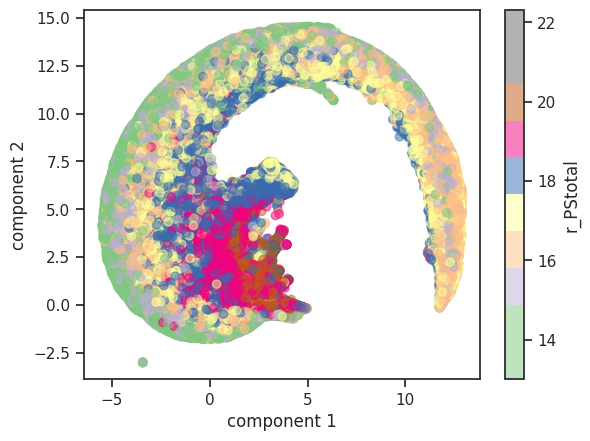

In [20]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_cleanErr["r"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()


# HDBSCAN

In [21]:
clusterer = hdbscan.HDBSCAN(min_samples=15, min_cluster_size=80, 
                             prediction_data=True, gen_min_span_tree=True)

In [22]:
clusterer.fit(X_trans)
labels = clusterer.labels_
len(labels)


197997

In [23]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_cluster5 = list(labels).count(5)
n_noise_ = list(labels).count(-1)

In [24]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of cluster points 5: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 9
Estimated number of cluster points 0: 718
Estimated number of cluster points 1: 130
Estimated number of cluster points 2: 351
Estimated number of cluster points 3: 93
Estimated number of cluster points 4: 299
Estimated number of cluster points 5: 195
Estimated number of noise points: 4211


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

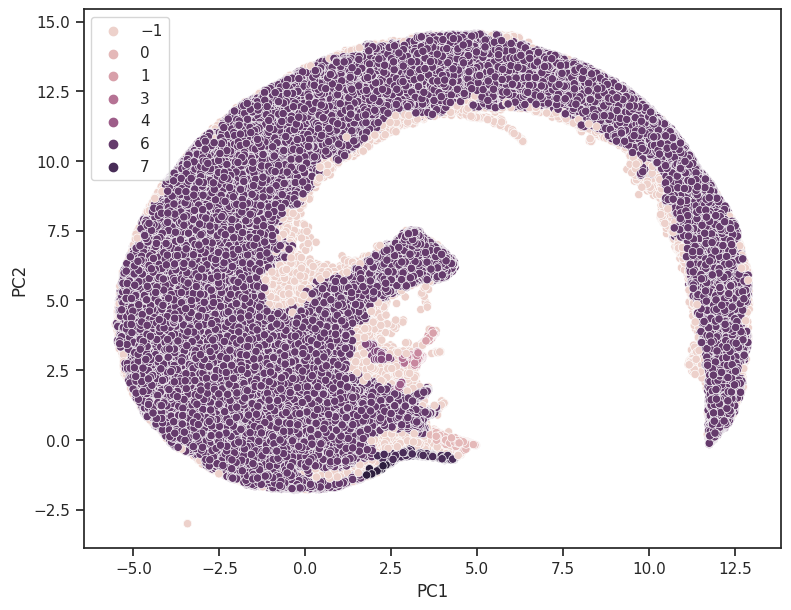

In [25]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

In [26]:
# Concatenat the original claen table with the umap results
df_cleanErr.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_cleanErr, umap_df], axis=1)
df_cleanErr_umap

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,ellog_r,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r,PC1,PC2
0,5,41.707425,-31.609540,19.453903,0.102211,17.678207,0.008456,17.070164,0.005748,16.682482,...,1.580351,0.367229,0.028626,0.024721,10.207849,1979,18.582102,3.5,5.378093,12.006664
1,9,41.837251,-31.610296,16.722420,0.006870,14.648617,0.001814,13.828032,0.001178,13.586303,...,1.257020,0.204468,0.999676,0.000744,1.706050,534,15.280809,3.5,5.181224,13.402709
2,10,42.123689,-31.610100,99.000000,99.000000,17.397250,0.007173,17.111893,0.005796,17.074059,...,2.551127,0.608016,0.028643,0.030338,4.576429,684,18.362354,3.5,2.930510,0.868139
3,14,41.790790,-31.606498,20.036427,0.059312,19.089579,0.019787,18.884172,0.016298,18.775597,...,1.210605,0.173967,0.025280,0.019743,4.307553,222,20.717072,3.5,0.331005,1.565047
4,15,42.266146,-31.607116,18.877712,0.024759,17.540083,0.007836,16.963991,0.005452,16.726400,...,1.100729,0.091511,0.983367,0.001833,1.628635,154,18.322666,3.5,-1.324363,5.639413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197992,31894,57.165419,-40.774972,16.007465,0.007698,14.063664,0.002421,13.388675,0.001521,13.161354,...,1.026954,0.026247,0.998693,0.001102,1.785359,801,14.674017,3.5,1.347317,12.573924
197993,31899,56.398310,-40.773251,16.916386,0.012058,15.534617,0.004844,15.036824,0.003278,14.927319,...,1.066581,0.062425,0.980024,-0.000275,1.607163,368,16.203690,3.5,-4.595327,5.504764
197994,31917,56.549289,-40.783965,19.949713,0.070025,18.137236,0.018197,17.421782,0.010621,17.228914,...,1.058522,0.055286,0.988234,-0.000231,1.581114,83,18.617546,3.5,0.680878,11.167789
197995,31932,57.905789,-40.801310,19.873571,0.066571,18.686644,0.024835,18.142593,0.015653,17.960854,...,1.068125,0.063780,0.998646,-0.000434,1.646903,66,19.341406,3.5,-1.273425,5.153038


In [27]:
df_cleanErr_umap["Label"] = labels

In [28]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")


In [29]:
# Define the directory where you want to save the CSV files
directory = '../Groups_noU/'


In [30]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'fornax_noise.csv'
    else:
        filename = f'fornax_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)